In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


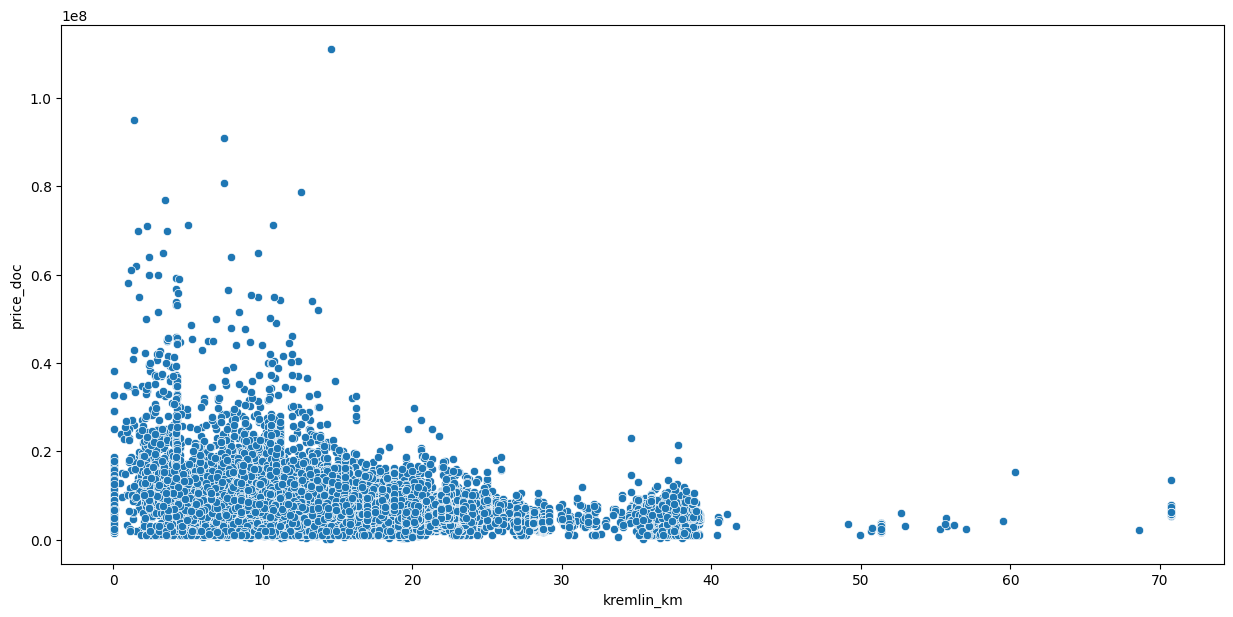

In [3]:
fig = plt.figure(figsize=(15, 7))
boxplot = sns.scatterplot(sber_data, x='kremlin_km', y='price_doc')

In [4]:
from outliers_lib.outliers import outliers_iqr_mod, outliers_z_score_mod

outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3, right=3)
outliers.shape[0]


92

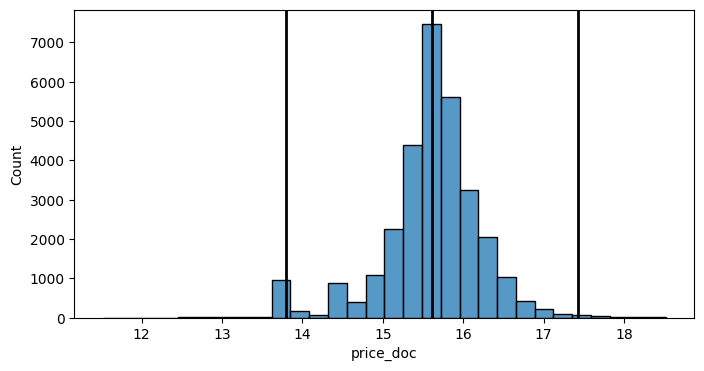

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
log_price = np.log(sber_data['price_doc']+1)
hplot = sns.histplot(log_price, bins=30, ax=ax)
hplot.axvline(log_price.mean(), color='k', lw=2)
hplot.axvline(log_price.mean() + log_price.std() * 3, color='k', lw=2)
hplot.axvline(log_price.mean() - log_price.std() * 3, color='k', lw=2)
